In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### Baseline Dataset: Unsupervised Learning - Clustering

(a) Apply two different clustering techniques to the dataset (excluding the class labels). In your report, briefly explain the differences between the two methods and in more detail explain the difference in outputs between the two methods when applied to this dataset. Include a contingency table to summarise the number of observations assigned to each cluster using each technique. You may need to choose an appropriate number of clusters and justify this choice.

In [2]:
df = pd.read_csv('../Data/ADS_baselineDataset.csv', index_col=0)
df.head()

,Fea1,Fea2,Fea3,Fea4,Fea5,Fea6,Fea7,Fea8,Fea9,Fea10,...,Fea992,Fea993,Fea994,Fea995,Fea996,Fea997,Fea998,Fea999,Fea1000,type
Sample1,0.0,1.386294,0.0,0.0,2.639057,0.0,2.944439,0.0,1.098612,0.0,...,2.302585,0.0,1.098612,0.0,0.00000,0.000000,3.496508,0.0,0.000000,2
Sample2,0.0,0.693147,0.0,0.0,1.791759,0.0,2.833213,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.00000,2.484907,3.218876,0.0,0.000000,1
Sample3,0.0,3.891820,0.0,0.0,3.367296,0.0,2.833213,0.0,0.000000,0.0,...,2.302585,0.0,0.000000,0.0,0.00000,3.526361,4.454347,0.0,2.484907,2
Sample4,0.0,3.828641,0.0,0.0,0.000000,0.0,1.945910,0.0,3.401197,0.0,...,0.000000,0.0,2.079442,0.0,1.94591,1.791759,4.406719,0.0,2.772589,3
Sample5,0.0,3.258097,0.0,0.0,1.098612,0.0,2.397895,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,1.94591,1.098612,2.772589,0.0,1.945910,1


**K-Means Clustering**\
K-Means clustering is an unsupervised learning algorithm that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

**Spectral Clustering**\
Spectral clustering is a general class of clustering methods, drawn from linear algebra. Spectral clustering is a technique that uses the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. It is a technique that can be used to perform clustering when there is no obvious structure in the data.

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**\
DBSCAN is a density-based clustering algorithm. It is a clustering algorithm that groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

**Agglomerative Clustering**\
Agglomerative clustering is a bottom-up hierarchical clustering algorithm. It is a clustering algorithm that groups together the data points with the most similar characteristics. It starts with each data point in a single cluster and then merges the two most similar clusters until some stopping criterion is satisfied.

In [3]:
X = df.drop('type', axis=1)

100%|██████████| 9/9 [00:53<00:00,  5.96s/it]


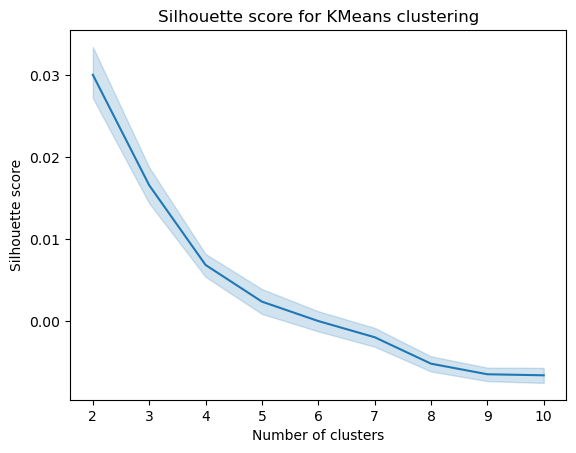

In [4]:
# KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette score to find optimal K
results = []
num_repeats = 100
k_values = range(2, 11)
for k in tqdm(k_values):
    for i in range(num_repeats):
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=i).fit(X)
        sil = silhouette_score(X, kmeans.labels_)
        results.append([k, sil])

results = pd.DataFrame(results, columns=['k', 'silhouette'])
sns.lineplot(x='k', y='silhouette', data=results)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for KMeans clustering')
plt.savefig('../Plots/Q5a_KMeans_silhouette.png')
plt.show()

In [5]:
# count number of points in each cluster
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(X)
labels = kmeans.labels_
counts = np.bincount(labels)
for i in range(len(counts)):
    print(f'Cluster {i+1}: {counts[i]} points')

Cluster 1: 229 points
Cluster 2: 271 points


In [6]:
# Scale data for sensitive clustering algorithms
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:01<00:00,  5.78it/s]


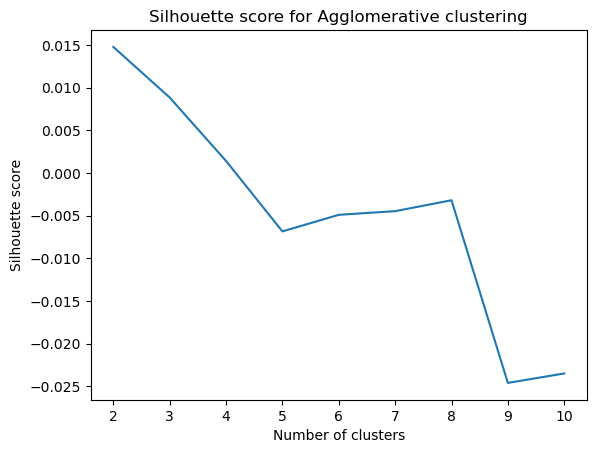

In [7]:
# Agglomerative clustering (hierarchical clustering)
from sklearn.cluster import AgglomerativeClustering

# Silhouette score to find optimal K
# NOTE: no repeats needed as Agglomerative clustering is deterministic
results = []
num_repeats = 10
k_values = range(2, 11)
for k in tqdm(k_values):
    agg = AgglomerativeClustering(n_clusters=k).fit(X)
    sil = silhouette_score(X, agg.labels_, metric='euclidean')
    results.append([k, sil])

results = pd.DataFrame(results, columns=['k', 'silhouette'])
sns.lineplot(x='k', y='silhouette', data=results)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score for Agglomerative clustering')
plt.savefig('../Plots/Q5a_Agglomerative_silhouette.png')
plt.show()

In [8]:
# count number of points in each cluster
agg = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
labels = agg.labels_
counts = np.bincount(labels)
for i in range(len(counts)):
    print(f'Cluster {i}: {counts[i]} points')

Cluster 0: 225 points
Cluster 1: 275 points


In [9]:
# KMeans
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(X)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2).fit(X_scaled)

# contingency table
contingency_table = pd.crosstab(kmeans.labels_, agg.labels_)
contingency_table.index.name = 'KMeans'
contingency_table.columns.name = 'Agglomerative'
print(contingency_table)

Agglomerative    0    1
KMeans                 
0               73  156
1              152  119


In [10]:
# flip agglormerative labels so biggest clusters are agreed
new_agg_labels = np.where(agg.labels_ == 0, 1, 0)
contingency_table = pd.crosstab(kmeans.labels_, new_agg_labels)
contingency_table.index.name = 'KMeans'
contingency_table.columns.name = 'Agglomerative'
print(contingency_table)

Agglomerative    0    1
KMeans                 
0              156   73
1              119  152


(b) For each of the clusterings you have obtained in (a), train a classifier to predict cluster membership and use this to identify the most discriminative features. In each case, apply the same clustering technique using only this subset of features. In your report, compare the partitions using the subset of features against the ones obtained using the entire dataset.

In [11]:
# Use random forest classiifer
from sklearn.ensemble import RandomForestClassifier as RFC

def get_top_features(X, y, model=RFC(random_state=42), threshold=0.99):
    # train model on given model and cluster labels
    model.fit(X, y)
    
    # get feature importances
    feature_importances = model.feature_importances_
    feature_importances = pd.DataFrame(
        feature_importances, index=X.columns, columns=['importance'])
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    
    # get top n features that sum to <threshold> of total importance
    cumsum = feature_importances.cumsum()
    top_features = cumsum[cumsum['importance'] <= threshold].index
    print(f'Top {len(top_features)} features sum to {threshold} of total importance.')
    return top_features

In [12]:
# kmeans labels
print('KMeans labels')
top_features_for_kmeans = get_top_features(X, kmeans.labels_)

# agglomerative labels
print('\nAgglomerative labels')
top_features_for_agg = get_top_features(X, agg.labels_)

KMeans labels
Top 562 features sum to 0.99 of total importance.

Agglomerative labels
Top 604 features sum to 0.99 of total importance.


In [13]:
# Apply same clustering techniques as before to subset of features
# KMeans
subset_for_kmeans = X[top_features_for_kmeans]
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(subset_for_kmeans)

# Agglomerative clustering
subset_for_agg = X[top_features_for_agg]
agg = AgglomerativeClustering(n_clusters=2).fit(subset_for_agg)

# contingency table
print('Contingency table for top features only')
contingency_table = pd.crosstab(kmeans.labels_, agg.labels_)
contingency_table.index.name = 'KMeans'
contingency_table.columns.name = 'Agglomerative'
print(contingency_table)

Contingency table for top features only
Agglomerative    0    1
KMeans                 
0              190   40
1               13  257


In [14]:
# Compare results from subsets against complete dataset
# KMeans
kmeans_total = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(X)
kmeans_subset = KMeans(n_clusters=2, n_init='auto', random_state=42).fit(subset_for_kmeans)

# contingency table
print('Contingency table for KMeans')
contingency_table = pd.crosstab(kmeans_total.labels_, kmeans_subset.labels_)
contingency_table.index.name = 'KMeans (total)'
contingency_table.columns.name = 'KMeans (subset)'
print(contingency_table)

print()

# Agglomerative clustering
agg_total = AgglomerativeClustering(n_clusters=2).fit(X)
agg_subset = AgglomerativeClustering(n_clusters=2).fit(subset_for_agg)

# contingency table
print('Contingency table for Agglomerative clustering')
agg_subset_labels = np.where(agg_subset.labels_ == 0, 1, 0)  # flip to be more readable
contingency_table = pd.crosstab(agg_total.labels_, agg_subset_labels)
contingency_table.index.name = 'Agglomerative (total)'
contingency_table.columns.name = 'Agglomerative (subset)'
print(contingency_table)

Contingency table for KMeans
KMeans (subset)    0    1
KMeans (total)           
0                229    0
1                  1  270

Contingency table for Agglomerative clustering
Agglomerative (subset)    0    1
Agglomerative (total)           
0                       259   16
1                        38  187


(c) Visualise the clusters in a lower-dimensional space and colour each point according to:
1. The cluster membership
2. The values of the most descriminative feature
3. The value of the next most discriminative feature

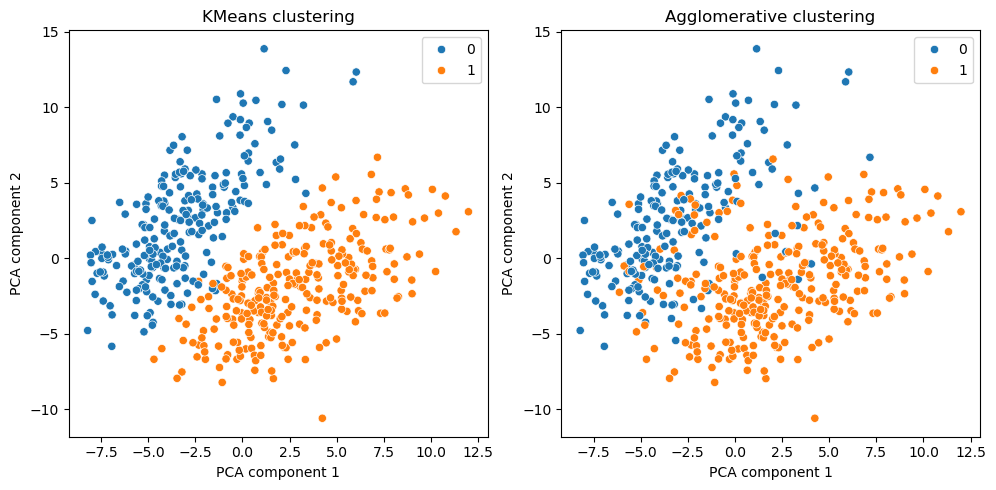

In [15]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# plot PCA coloured by kmeans labels side by side with agglomerative
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_)
plt.title('KMeans clustering')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg.labels_)
plt.title('Agglomerative clustering')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.tight_layout()
plt.savefig('../Plots/Q5c_KMeans_Agglomerative_PCA.png')
plt.show()

In [16]:
top_features_for_kmeans

Index(['Fea162', 'Fea630', 'Fea314', 'Fea70', 'Fea243', 'Fea270', 'Fea181',
       'Fea210', 'Fea385', 'Fea170',
       ...
       'Fea550', 'Fea83', 'Fea815', 'Fea177', 'Fea735', 'Fea322', 'Fea350',
       'Fea244', 'Fea113', 'Fea668'],
      dtype='object', length=562)

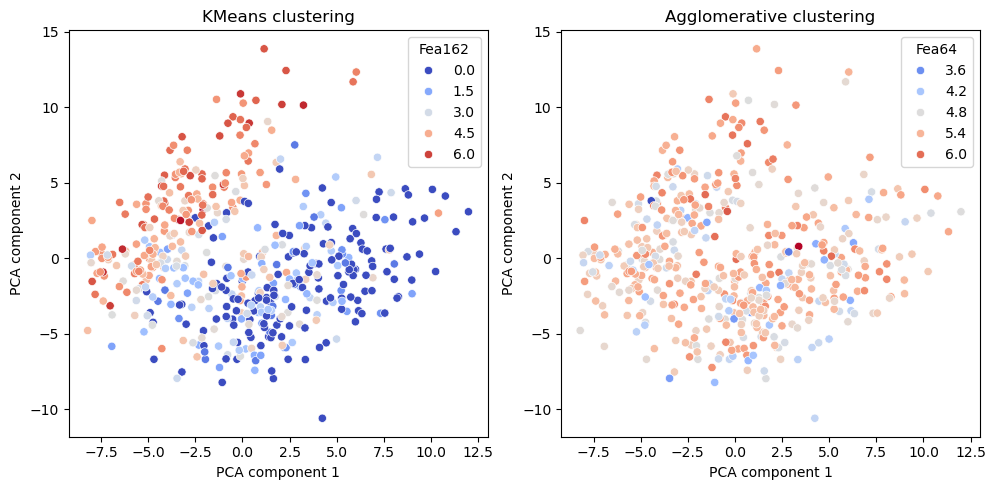

In [17]:
# side by side colour value of most important feature
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X[top_features_for_kmeans[0]],
                palette='coolwarm')
plt.title('KMeans clustering')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X[top_features_for_agg[0]],
                palette='coolwarm')
plt.title('Agglomerative clustering')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.tight_layout()
plt.savefig('../Plots/Q5c_KMeans_Agglomerative_PCA_top_feature.png')
plt.show()

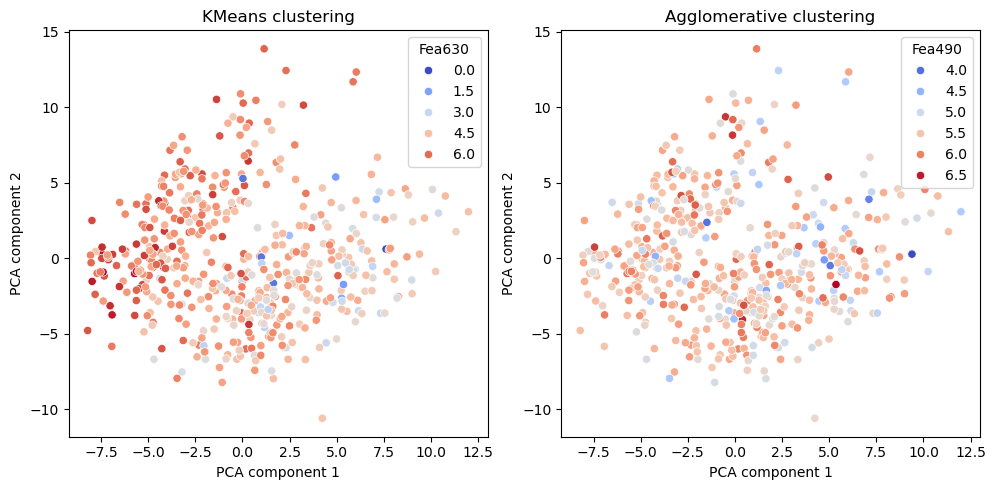

In [18]:
# side by side colour value of second most important feature
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X[top_features_for_kmeans[1]],
                palette='coolwarm')
plt.title('KMeans clustering')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X[top_features_for_agg[1]],
                palette='coolwarm')
plt.title('Agglomerative clustering')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.tight_layout()
plt.savefig('../Plots/Q5c_KMeans_Agglomerative_PCA_second_feature.png')
plt.show()